In [ ]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# Cargar la imagen
image = cv2.imread('/content/images.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
# Convertir la imagen en un array 2D
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

In [ ]:
# Implementar K-Means con sklearn
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pixel_values)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [ ]:
# Reemplazar cada pixel con su centroide
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(image.shape)
segmented_image = np.uint8(segmented_image)

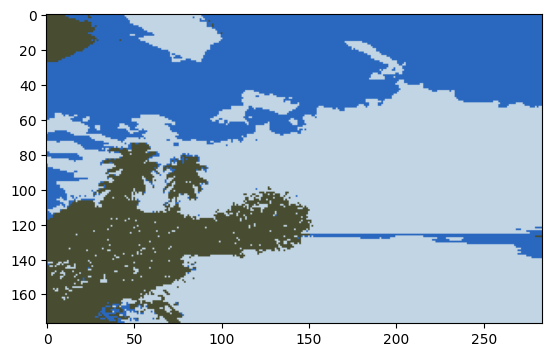

In [ ]:
# Mostrar la imagen segmentada
plt.imshow(segmented_image)
plt.show()

 **Segmentación con K-Means usando OpenCV**

In [ ]:
# Implementar K-Means con OpenCV
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [ ]:
# Convertir los centros a enteros
centers = np.uint8(centers)

# Reemplazar cada pixel con su centroide
segmented_image_cv = centers[labels.flatten()]
segmented_image_cv = segmented_image_cv.reshape(image.shape)

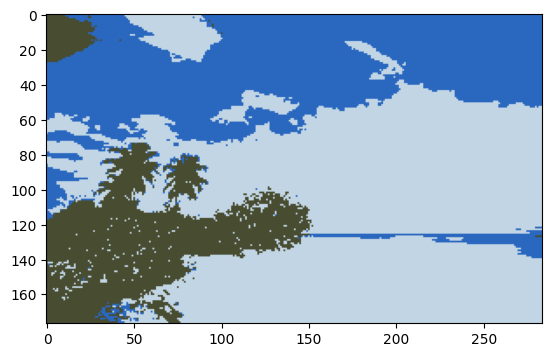

In [ ]:
# Mostrar la imagen segmentada
plt.imshow(segmented_image_cv)
plt.show()


**Comparación de Resultados podemos comparar las dos imágenes visualmente**


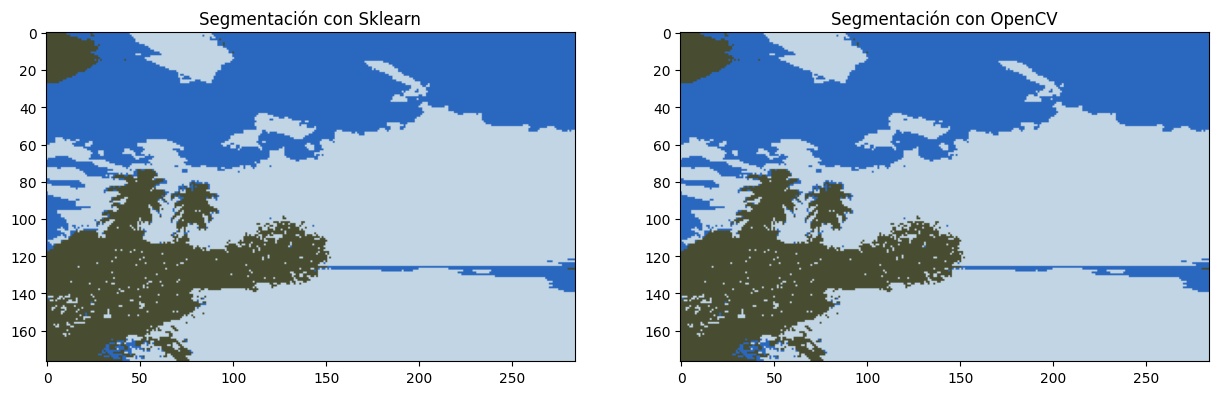

In [ ]:

# Comparar resultados
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ax[0].imshow(segmented_image)
ax[0].set_title('Segmentación con Sklearn')

ax[1].imshow(segmented_image_cv)
ax[1].set_title('Segmentación con OpenCV')

plt.show()

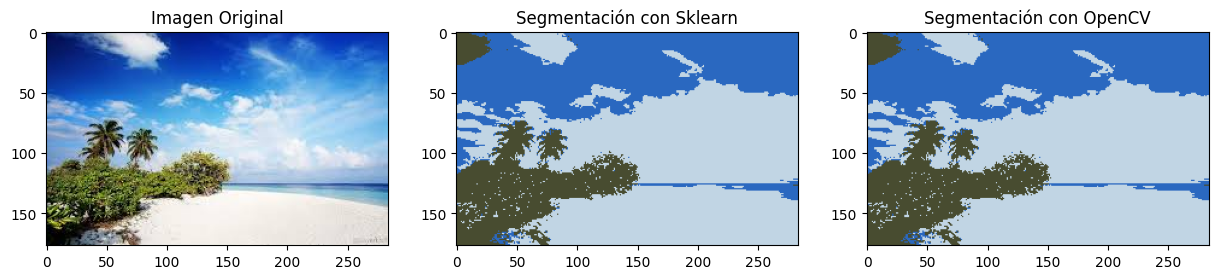

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 8))
ax[0].imshow(image)
ax[0].set_title('Imagen Original')
ax[1].imshow(segmented_image)
ax[1].set_title('Segmentación con Sklearn')
ax[2].imshow(segmented_image_cv)
ax[2].set_title('Segmentación con OpenCV')
plt.show()

